# Imports

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


# Data

In [78]:
data = pd.read_csv("Data/diabetes_binary_health_indicators_BRFSS2015.csv")

# Data Cleaning

No data cleaning needed as seen in Analyses.ipynb

# Models

In [79]:
Features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

X = data[Features]
y = data['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## scale the data

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

### SGD classifier

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[[31067 12672]
 [ 1470  5527]]
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     43739
         1.0       0.30      0.79      0.44      6997

    accuracy                           0.72     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.87      0.72      0.76     50736



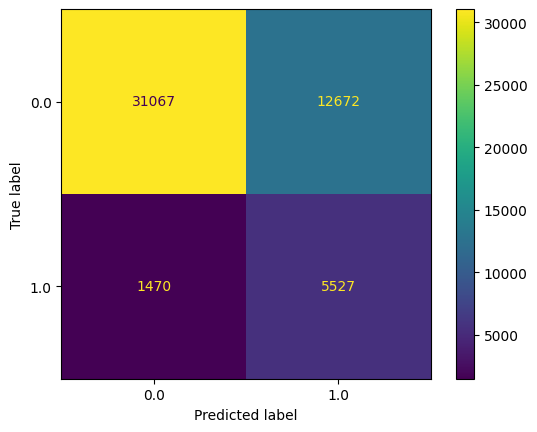

In [75]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000, 5000, 10000]
}

sgd_clf = SGDClassifier(random_state=42)

grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

best_sgd_clf = grid_search.best_estimator_

predictions = best_sgd_clf.predict(X_test_scaled)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_estimator(best_sgd_clf, X_test_scaled, y_test)
plt.show()

### Random forest

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\Nicolas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[37729  6010]
 [ 3152  3845]]
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89     43739
         1.0       0.39      0.55      0.46      6997

    accuracy                           0.82     50736
   macro avg       0.66      0.71      0.67     50736
weighted avg       0.85      0.82      0.83     50736

Best hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}


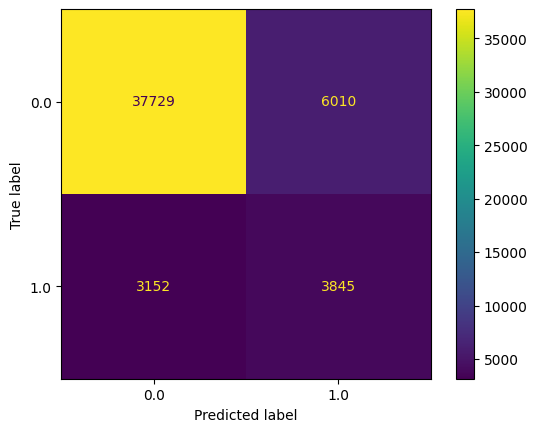

In [82]:
random_forest_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_random_forest = grid_search.best_estimator_

predictions = best_random_forest.predict(X_test_scaled)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print("Best hyperparameters:", grid_search.best_params_)

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_estimator(best_random_forest, X_test_scaled, y_test)
plt.show()